In [79]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score


In [80]:
#load data from csv to pandas dataframe
df=pd.read_csv("/content/drive/MyDrive/Datasets/Class Enrollment-Rohit.csv")

In [81]:
#print first five rows of dataframe
df.head()

,PassengerId,survived,Pclass,Name,sex,age,sibsp,parch,Ticket,fare,cabin,Embarked
0,115,0,3,jonson baby,male,40,0,0,44514,9.234,Nan,q
1,191,1,3,Justin perry,male,41,1,0,44851,9.215,Nan,s
2,154,1,2,cristiano messi,male,42,0,0,44621,8.632,Nan,q
3,176,0,3,neymar senior,male,35,1,1,55321,7.153,Nan,s
4,142,0,3,sunil fatri,male,38,1,0,52361,8.365,Nan,s


In [82]:
#no. of rows and col.
df.shape

(7, 12)

In [83]:
df.info


<bound method DataFrame.info of    PassengerId  survived  Pclass             Name     sex  age  sibsp  parch  \
0          115         0       3      jonson baby    male   40      0      0   
1          191         1       3     Justin perry    male   41      1      0   
2          154         1       2  cristiano messi    male   42      0      0   
3          176         0       3    neymar senior    male   35      1      1   
4          142         0       3      sunil fatri    male   38      1      0   
5          120         1       2     smriti dhoni  female   26      1      0   
6          116         1       2     jhulan kohli  female   29      0      1   

   Ticket   fare cabin Embarked  
0   44514  9.234   Nan        q  
1   44851  9.215   Nan        s  
2   44621  8.632   Nan        q  
3   55321  7.153   Nan        s  
4   52361  8.365   Nan        s  
5   51236  9.215   Nan        q  
6   42153  8.114   Nan        s  >

In [84]:
#checking no of missing values in each columns
df.isnull().sum()

PassengerId    0
survived       0
Pclass         0
Name           0
sex            0
age            0
sibsp          0
parch          0
Ticket         0
fare           0
cabin          0
Embarked       0
dtype: int64

In [85]:
#handaling missing values


In [86]:
#since majority of cabin values are missing , we need to drop the cabin column
df=df.drop(columns="cabin",axis=1)
df

,PassengerId,survived,Pclass,Name,sex,age,sibsp,parch,Ticket,fare,Embarked
0,115,0,3,jonson baby,male,40,0,0,44514,9.234,q
1,191,1,3,Justin perry,male,41,1,0,44851,9.215,s
2,154,1,2,cristiano messi,male,42,0,0,44621,8.632,q
3,176,0,3,neymar senior,male,35,1,1,55321,7.153,s
4,142,0,3,sunil fatri,male,38,1,0,52361,8.365,s
5,120,1,2,smriti dhoni,female,26,1,0,51236,9.215,q
6,116,1,2,jhulan kohli,female,29,0,1,42153,8.114,s


In [87]:
#replace the null in age column with the mean of ages
df['age'].fillna(df['age'].mean(),inplace=True)

In [88]:
df.isnull().sum()

PassengerId    0
survived       0
Pclass         0
Name           0
sex            0
age            0
sibsp          0
parch          0
Ticket         0
fare           0
Embarked       0
dtype: int64

In [89]:
#data analysis

In [90]:
df.describe()

,PassengerId,survived,Pclass,age,sibsp,parch,Ticket,fare
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,144.857143,0.571429,2.571429,35.857143,0.571429,0.285714,47865.285714,8.561143
std,30.366805,0.534522,0.534522,6.202918,0.534522,0.487950,5010.546701,0.767473
min,115.000000,0.000000,2.000000,26.000000,0.000000,0.000000,42153.000000,7.153000
25%,118.000000,0.000000,2.000000,32.000000,0.000000,0.000000,44567.500000,8.239500
50%,142.000000,1.000000,3.000000,38.000000,1.000000,0.000000,44851.000000,8.632000
75%,165.000000,1.000000,3.000000,40.500000,1.000000,0.500000,51798.500000,9.215000
max,191.000000,1.000000,3.000000,42.000000,1.000000,1.000000,55321.000000,9.234000


In [91]:
#finding how many survived and how many not 0=not survived 1=survived
df['survived'].value_counts()

1    4
0    3
Name: survived, dtype: int64

In [92]:
#data visualization
sns.set()

<Axes: xlabel='survived', ylabel='count'>

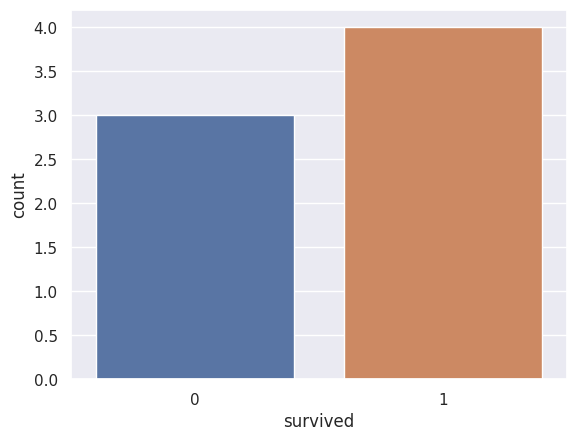

In [93]:
#making a count plot for survived column
sns.countplot(data=df,x='survived')


<Axes: xlabel='sex', ylabel='count'>

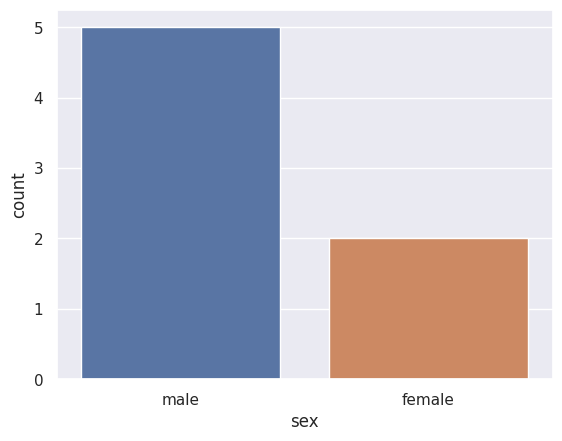

In [94]:
sns.countplot(x='sex',data=df)

<Axes: xlabel='sex', ylabel='count'>

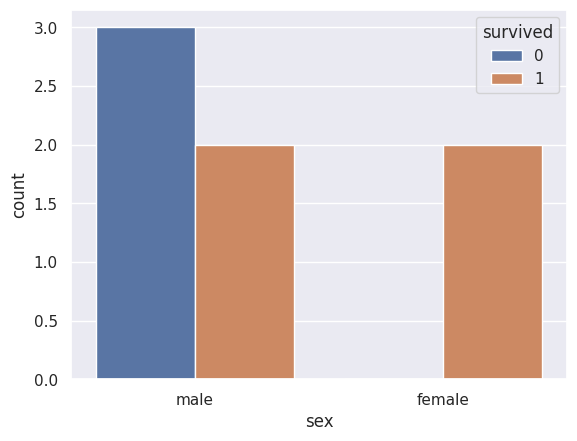

In [95]:
#comparing gender and survivals
sns.countplot(x='sex',hue="survived",data=df)

In [96]:
#from the above countplot we got to know that even though we have more males but the female count of survival is more than male

<Axes: xlabel='Pclass', ylabel='count'>

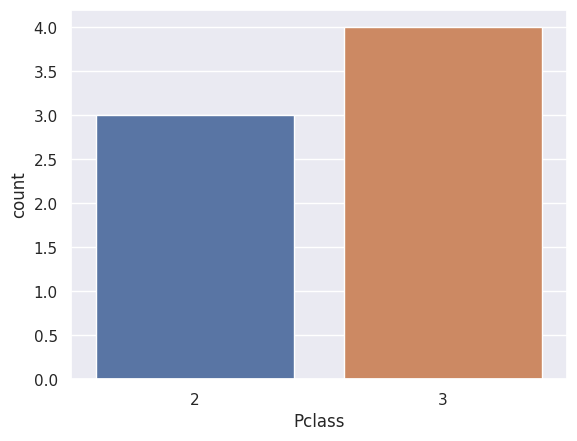

In [97]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

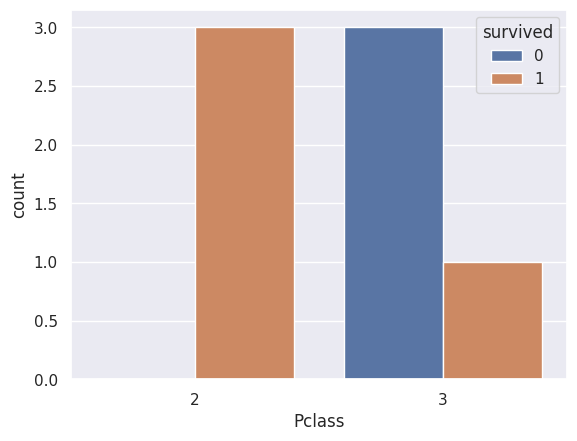

In [98]:
#finding number of people survived based on Pclass
sns.countplot(x='Pclass',hue='survived',data=df)

In [99]:
#converting the sex column datatype from text to number for training the model
#hence replacing male with 0 and female with 1

#encoding thr categorial columns
df['sex'].value_counts()

male      5
female    2
Name: sex, dtype: int64

In [100]:
df['Embarked'].value_counts()

s    4
q    3
Name: Embarked, dtype: int64

In [101]:
df.replace({'sex':{'male':0,'female':1},'Embarked':{"s":0,"c":1,"q":2}},inplace=True)

In [102]:
df.head()

,PassengerId,survived,Pclass,Name,sex,age,sibsp,parch,Ticket,fare,Embarked
0,115,0,3,jonson baby,0,40,0,0,44514,9.234,2
1,191,1,3,Justin perry,0,41,1,0,44851,9.215,0
2,154,1,2,cristiano messi,0,42,0,0,44621,8.632,2
3,176,0,3,neymar senior,0,35,1,1,55321,7.153,0
4,142,0,3,sunil fatri,0,38,1,0,52361,8.365,0


In [103]:
#seperating target column i.e survived with other features columns
x=df.drop(columns=['sibsp','Ticket','parch',]) #droping unneccessary columns
y=df['survived']
x=x.apply(pd.to_numeric,errors='coerce')
y=y.apply(pd.to_numeric,errors='coerce')
x.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [104]:
x

,PassengerId,survived,Pclass,Name,sex,age,fare,Embarked
0,115,0,3,0.0,0,40,9.234,2
1,191,1,3,0.0,0,41,9.215,0
2,154,1,2,0.0,0,42,8.632,2
3,176,0,3,0.0,0,35,7.153,0
4,142,0,3,0.0,0,38,8.365,0
5,120,1,2,0.0,1,26,9.215,2
6,116,1,2,0.0,1,29,8.114,0


In [105]:
y

0    0
1    1
2    1
3    0
4    0
5    1
6    1
Name: survived, dtype: int64

In [106]:
#splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

In [107]:
print(x.shape,x_train.shape,x_test.shape)

(7, 8) (6, 8) (1, 8)


In [108]:
#model training using logistic regression
model=LogisticRegression()


In [109]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 6 to 2
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  6 non-null      int64  
 1   survived     6 non-null      int64  
 2   Pclass       6 non-null      int64  
 3   Name         6 non-null      float64
 4   sex          6 non-null      int64  
 5   age          6 non-null      int64  
 6   fare         6 non-null      float64
 7   Embarked     6 non-null      int64  
dtypes: float64(2), int64(6)
memory usage: 432.0 bytes


In [110]:
model.fit(x_train,y_train)

LogisticRegression()

In [111]:
#model evaluation using accuracy_score from sklearn
#accuracy on training data
x_train_prediction=model.predict(x_train)

In [112]:
x_train_prediction

array([1, 1, 0, 1, 0, 1])

In [113]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [114]:
training_data_accuracy

1.0

In [115]:
#accuracy test on testing data
x_test_prediction=model.predict(x_test)

In [116]:
x_test_prediction

array([0])

In [117]:
testing_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [118]:
testing_data_accuracy

1.0

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
model_2 = RandomForestClassifier(n_estimators=100)

In [121]:
model_2.fit(x_train,y_train)

RandomForestClassifier()

In [122]:
x_test_pred = model_2.predict(x_test)

In [123]:
model_2.score(x_train,y_train)
acc_score = round(model_2.score(x_test,y_test)*100,2)
model_2_acc = accuracy_score(x_test_pred,y_test)

In [124]:
model_2_acc

1.0

In [125]:
acc_score

100.0

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
model_3 = KNeighborsClassifier(n_neighbors=3)

In [128]:
model_3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [129]:
x_test_pred = model_3.predict(x_test)

In [130]:
model_3_acc = accuracy_score(x_test_pred,y_test,normalize=True)

In [131]:
model_3_score = round(model_3.score(x_train, y_train)*100,2)

In [ ]:
model_3_precision = precision_score(x_test_pred,y_test)
model_3_recall = recall_score(x_test_pred, y_test)

In [134]:
model_3_score

66.67

In [135]:
model_3_acc

0.0

In [136]:
print(model_3_precision)
print(model_3_recall)

0.0
0.0


In [137]:
# we used diffrent model to predict the survival variable and got different accuracy score